<a href="https://colab.research.google.com/github/johnreyes96/artificial-intelligence/blob/master/src/main/python/workshops/WorkshopSolutionTwo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Punto 1

Valores iniciales
Centroide 1: [3, 4]
Centroide 2: [7, 2]


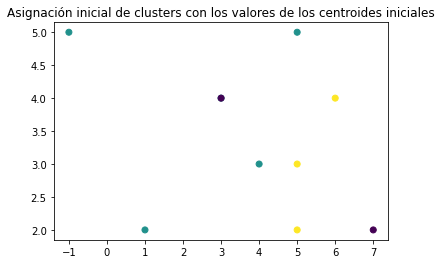


Actualicación 1
Centroide 1: [2.4 3.8]
Centroide 2: [5.33333333 3.        ]


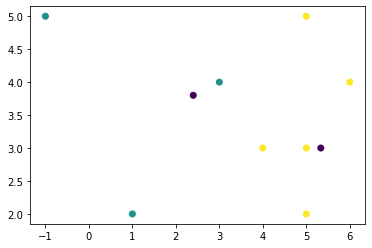


Actualicación 2
Centroide 1: [1.         3.66666667]
Centroide 2: [5.  3.4]


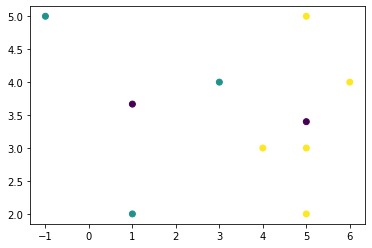

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

def distance(a, b):
  d = (a[0] - b[0])**2 + (a[1] - b[1])**2
  return d

C1 = [3, 4]
C2 = [7, 2]

for i in range(3):
  cluster_1 = []
  cluster_2 = []
  cluster_teams = []
  X = [[1, 2], [3, 4], [4, 3], [5, 2], [5, 3], [6, 4], [5, 5], [-1, 5]]
  cluster_centroide = X
  # asignacion
  for x in X:
    if distance(x, C1) < distance(x, C2):
      cluster_1.append(x)
      cluster_teams.append(1)
    else:
      cluster_2.append(x)
      cluster_teams.append(2)

  if i == 0:
    print("Valores iniciales")
  else:
    print("\nActualicación " + str(i))
  print("Centroide 1: " + str(C1))
  print("Centroide 2: " + str(C2))
  cluster_centroide.append(C1)
  cluster_teams.append(0)
  cluster_centroide.append(C2)
  cluster_teams.append(0)

  fig, ax = plt.subplots()
  ndarray = np.array(cluster_centroide)
  ax.scatter(x=ndarray[:,0], y=ndarray[:,1], c=np.array(cluster_teams))
  if i == 0:
    plt.title("Asignación inicial de clusters con los valores de los centroides iniciales")
  plt.show()

  # actualizacion
  C1 = np.mean(cluster_1, axis = 0)
  C2 = np.mean(cluster_2, axis = 0)

Punto 2


Eps: 1 MinPts: 1
Número estimado de clusters: 3
Número estimado de puntos de ruido: 0


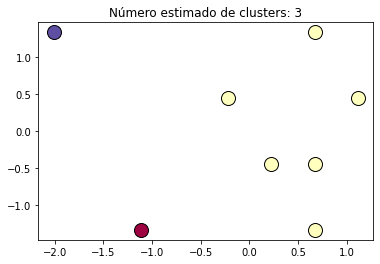


Eps: 1 MinPts: 2
Número estimado de clusters: 1
Número estimado de puntos de ruido: 2


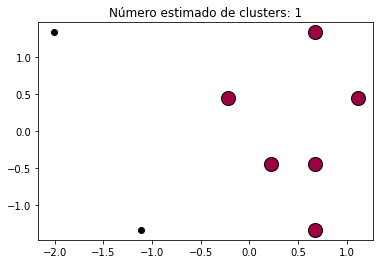


Eps: 1.5 MinPts: 1
Número estimado de clusters: 3
Número estimado de puntos de ruido: 0


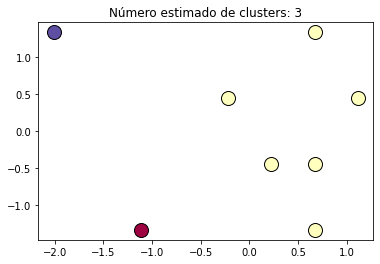


Eps: 1.5 MinPts: 2
Número estimado de clusters: 1
Número estimado de puntos de ruido: 2


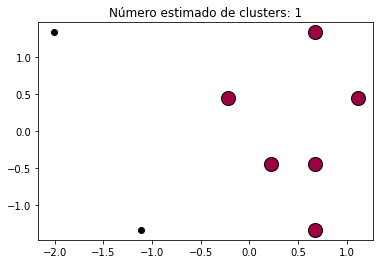


Eps: 3 MinPts: 1
Número estimado de clusters: 1
Número estimado de puntos de ruido: 0


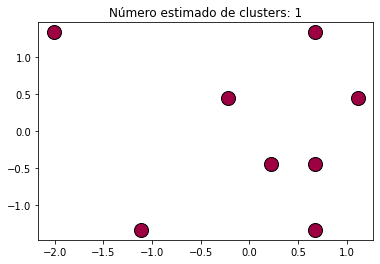


Eps: 3 MinPts: 2
Número estimado de clusters: 1
Número estimado de puntos de ruido: 0


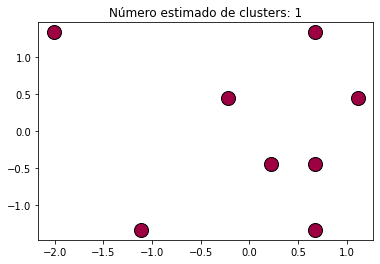

In [112]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[3, 4], [7, 2]]
X = np.array([[1, 2], [3, 4], [4, 3], [5, 2], [5, 3], [6, 4], [5, 5], [-1, 5]])
X = StandardScaler().fit_transform(X)

params = [[1, 1], [1, 2], [1.5, 1], [1.5, 2], [3, 1], [3, 2]]
for param in params:
  db = DBSCAN(eps = param[0], min_samples = param[1]).fit(X)

  core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
  labels = db.labels_

  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  n_noise_ = list(labels).count(-1)

  print("\nEps: " + str(param[0]) + " MinPts: " + str(param[1]))
  print("Número estimado de clusters: %d" % n_clusters_)
  print("Número estimado de puntos de ruido: %d" % n_noise_)

  import matplotlib.pyplot as plt

  unique_labels = set(labels)
  colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
  for k, col in zip(unique_labels, colors):
      if k == -1:
          col = [0, 0, 0, 1]

      class_member_mask = labels == k

      xy = X[class_member_mask & core_samples_mask]
      plt.plot(
          xy[:, 0],
          xy[:, 1],
          "o",
          markerfacecolor=tuple(col),
          markeredgecolor="k",
          markersize=14,
      )

      xy = X[class_member_mask & ~core_samples_mask]
      plt.plot(
          xy[:, 0],
          xy[:, 1],
          "o",
          markerfacecolor=tuple(col),
          markeredgecolor="k",
          markersize=6,
      )

  plt.title("Número estimado de clusters: %d" % n_clusters_)
  plt.show()

Punto 3

[[ 1.          3.          1.          2.        ]
 [ 2.          7.          1.41421356  3.        ]
 [ 4.          5.          1.41421356  2.        ]
 [ 0.          8.          2.82842712  4.        ]
 [ 9.         10.          3.          6.        ]
 [ 6.         11.          7.07106781  7.        ]]


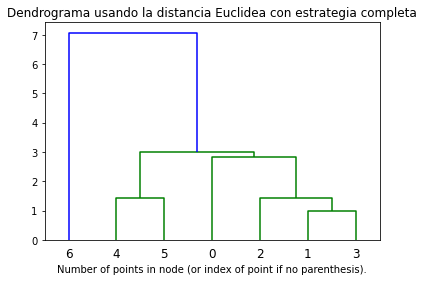



[[ 1.          3.          1.          2.        ]
 [ 7.          2.          1.          3.        ]
 [ 0.          8.          1.41421356  4.        ]
 [ 9.          4.          1.41421356  5.        ]
 [10.          5.          1.41421356  6.        ]
 [11.          6.          4.12310563  7.        ]]


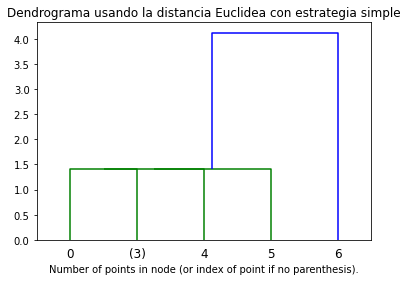

In [102]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):

    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)
    print(linkage_matrix)

    dendrogram(linkage_matrix, **kwargs)


X = np.array([[1, 2], [3, 4], [4, 3], [5, 2], [5, 3], [6, 4], [5, 5], [-1, 5]])
modelComplete = AgglomerativeClustering(distance_threshold = 0, n_clusters = None, linkage = "complete")
modelSingle = AgglomerativeClustering(distance_threshold = 0, n_clusters = None, linkage = "single")

modelComplete = modelComplete.fit(X[1:8,0:2])
modelSingle = modelSingle.fit(X[1:8,0:2])

plt.title("Dendrograma usando la distancia Euclidea con estrategia completa")
plot_dendrogram(modelComplete, truncate_mode = "level", p = 3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

print("\n")

plt.title("Dendrograma usando la distancia Euclidea con estrategia simple")
plot_dendrogram(modelSingle, truncate_mode = "level", p = 3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()